## Informed_Search_Algorithms
### Artificial Intelligence 1: week 11

## This week
- Recap: uninformed search algorithms for decision problems

- Heuristic Quality Functions

- General framework for informed search
  - Search guided by cost/quality function  
    Without backtracking:  Hill Climbing (local search)  
    With backtracking: Best-First Search
  - Search taking into account cost of steps taken  
    Dijkstra (path-finding),  A* 
    
- Example applications:
    - inside Machine Learning algorithms
    - path-finding
    - optimisation
    
- Strengths and weaknesses to take into account  
  when selecting a search algorithm to apply to a problem
  

## Recap

## How could we make those better?<img src="figures/search/timer.png" style="float:right" width = 15%>


Breadth/depth-first generate nodes to test:
-  based on the shape of the tree,
- ingoring  how good the solutions are,  
- or how close they might be to the goal state.

we say they are “blind” or “uninformed”.

More efficient approach is to incorporate information about how close you are to the solution

USE ANYTHING YOU HAVE TO HAND if it helps you avoid constraints!

<img src="figures/search/multitool.png" style="float:right" width = 20%>

## Quality Functions
Natural for some problems, e.g.:
- Model Building: error rate of model on training set,
- Optimisation: Distance, cost, payoff
- Prediction: error rate of model in real world…

Often more than one
- hence “heuristic” (rule of thumb)
- Some may take more effort to calculate
  - simulations run at different fidelity,
  - User studies with different sized groups


## Estimated Quality Measures
For other problems we can define a
	“heuristic evaluation function” , h(n)  for each node n:
 - provides information to **guide**  *informed search*.
 - **estimates** how far a node is from the goal state,

Comparing two nodes m  and n 
- h(m) < h(n) implies m is closer to the goal.
- So typically we look to **minimise** the function.

Also known as a ...  
  cost function  
  quality function,  
  ‘score’,  
  ‘fitness’  (to be maximised)


## Choosing Heuristic Functions
 Should be quick to calculate
 
 Might simplify or ignotre constraints (especially 'soft' ones)
 
 More different levels the better (provbide more information to search)
 
 Should be "optimistic" (underestimate distance/cost)
  - e.g. training set accuracy underestimates error on unseen data
 
 
** NEEDS pics of teow landscapes with different granularity:   **
 

## Adding heuristic functions ot our generate and test code

Minor change to pseudocode we had for depth and breadth first:

Now our Evaluate() function gives some idea of quality instead of just feasibility

So we can add a line to sort by that value

Could do the same with blindsearch using quality = age

- Depth|Breadth => sort increasing | decreasing
 - But don’t usually bother to add the extra time spent sorting


## Pseudcode for informed search
    
    ## make initial guess,  test it, then start the openList ##
    SET workingCandidate = StartSolution
    Evaluate (workingCandidate)
    IF( IsAtGoal(workingCandidate)) 
        OUTPUT (SUCCESS, workingCandidate)
    APPEND workingCandidate to openList
    

    WHILE ( Openlist not empty) DO
      SORT(OpenList)                  ## This is the new line 
      MOVE (first item from openList into working candidate)
      FOREACH (1-step neighbour)
        neighbour = ApplyMoveOperator(workingCandidate)  ## Generate
        Evaluate(neighbour)                              ## Test 
	    IF(IsAtGoal(neighbour))
          OUTPUT (SUCCESS, neighbour)
        ELSE IF (neighbor is feasible)                   ## Update Memory
          APPEND( neighbor to end of openList)
        ELSE
          APPEND( neighbor to end of closedList)
      COPY (working candidate to closedList)
 
    ** only get this far if we've run out of candidate solutions to test
    OUTPUT (FAILURE, workingCandidate)





<div class="alert alert-block alert-danger"> The only difference is the extra line at the start of  each iteration: <b>Sort(OpenList)</b></div> 

## Simple example: Hill Climbing local search

Sorts list by decreasing quality <=> increasing distance_to_goal

Doesn’t allow back-tracking 
  - Discard all but top node after sorting.

In practice: examine child-nodes then:
 - move to one with better heuristic value if exists,
 - else stop (even if goal / global optimum not reached)

greedy/steepest ascent variants:
 - Examine all child nodes and follow first / best  improvement.

**Quick but gets stuck in local optima**


## Hill Climbing can get stuck even on our simple example! <img src="figures/search/hillclimbing-tree.png" style="float:right" width=50%>



 ## Pseudocode for hill-climbing (main loop only)
 
    WHILE ( Openlist not empty) DO
      SORT(OpenList by increasing distance to goal)  #quality
      DELETE(all but first item in openlist)         # no backtracking
      MOVE (first item from openList into working candidate)
      FOREACH (1-step neighbour)
        neighbour = ApplyMoveOperator(workingCandidate)  
        Evaluate(neighbour)                               
	    IF(IsAtGoal(neighbour))
          OUTPUT (SUCCESS, neighbour)
        ELSE IF (neighbor is better than workingCandidate) #stop at plateau    
          APPEND( neighbor to end of openList)
        ELSE
          APPEND( neighbour to end of closedList)
      COPY (working candidate to closedList)


## Best First Search <img src="figures/search/best-first-tree.png" style="float:right" width = 50%>
Like hill-climbing is driven by quality  
**but keeps unused nodes in the open list**

At every iteration:
- sort **whole queue** by decreasing quality,  
  instead of just sorting children of current node.
- i.e. doesn’t removed unexplored nodes  
  This adds  backtracking

Tends to produce shorter paths than depth- or breadth first search


### pseudocode for best-first search (main loop only)
    WHILE ( Openlist not empty) DO
      SORT(OpenList by increasing distance to goal)  ## quality
      MOVE (first item from openList into working candidate)
      FOREACH (1-step neighbour)
        neighbour = ApplyMoveOperator(workingCandidate)  
        Evaluate(neighbour)                               
	    IF(IsAtGoal(neighbour))
          OUTPUT (SUCCESS, neighbour)
        ELSE IF (neighbour is feasible) ##don't stop at plateau 
          APPEND( neighbour to end of openList)
        ELSE
          APPEND( neighbour to end of closedList)
      COPY (working candidate to closedList)



<div class="alert alert-block alert-danger"> note best-first get back-tracking by omitting the line <b>DELETE(all but first item in openlist)</b>  </div> 

## Quiz Questions:
- Hill-Climbers can get stuck in local optima (True:False)
- The local optima a hill-climber finds, depends on where it starts (True:False)
- Which of these might help local search?Vote for as many as you think will
  - Multiple runs from random starting places
  - Multiple runs, start each one by making random changes to  the last local optimum
  - One  run, changing the move operator everytime you reach a local optimum
  - Sometimes accepting worsening moves


## Taking into account the cost of reaching a solution

E.g. planning 
Routes to avoid toll roads (cost) or built-up areas (air pollution)
path of a manipulator to reduce number of moves 


## A* : **guaranteed** shortest/least cost paths <img src="figures/search/optimal.png" style="float:right" width = 25%>
Adds cost to Best-First to find optima
 - Shortest path / least complex model,

Sorts the list of unexplored nodes by f(node):
- f(node) = g(node) + h(node),  
  h(node) =  estimated distance to goal (heuristic).  
  g(node) = cost of reaching that node.

So you can stop looking as soon as  you know that   
g(node) > best_so_far for all remaining nodes

**A* is complete and optimal as long as h(node) is an underestimate**

A* is used for : path-finding (especially NPCs in games),   query optimisation, …


## pseudocode for A* (main loop only)

    WHILE ( Openlist not empty) DO
      SORT(OpenList by combined distance to goal and cost)  ## quality
      MOVE (first item from openList into working candidate)
      FOREACH (1-step neighbour)
        neighbour = ApplyMoveOperator(workingCandidate)  
        Evaluate(neighbour)                               
        IF(IsAtGoal(neighbour))
          OUTPUT (SUCCESS, neighbour)
        ELSE IF (neighbour is feasible) ##don't stop at plateau 
          APPEND( neighbour to end of openList)
        ELSE
          APPEND( neighbour to end of closedList)
      COPY (working candidate to closedList)
<div class="alert alert-block alert-danger"> This is just best-first with a modified sort condition.<br> You could modify the IF statement to only add things to openlist if g(neighbour) < f(workingCandidate)  </div> 

## A* example <img src="figures/search/Astar-tree.png" style = "float:right" width = 40%>
 We show the cost as a second number in each node – in this case just the depth

## What does "optimality" mean for A* ?
Finds node which satisfies the goal criteria

If there is more than one of these, it finds the one with the least cost 

How else could we interpret this?
What might be desirable?




# Dijktra's algorithm
<img src = "figures/search/dijkstra.gif" style = "float:right" width = 50%>

Designed for use in tracing routes between points in an weighted undirected graph.
- "weighted" means there are cost/distances on each link (edge in the graph)  
  e.g. tolls/ different terrains, ...
- "undirected" means you can traverse an edge in either direction ( no one-way roads)

Finds the single shortest path between two points
Most used for path-finding – a *lot* in games

Like A* but ignores heuristic cost
h(n) = 0 for all n

"Dijkstra Animation" by Ibmua - Work by uploader.. Licensed under Public Domain via Commons - https://commons.wikimedia.org/wiki/File:Dijkstra_Animation.gif#/media/File:Dijkstra_Animation.gif


## Really good description and discussion of howe different algorithms can be used for path-finding

http://www.redblobgames.com/pathfinding/a-star/introduction.html
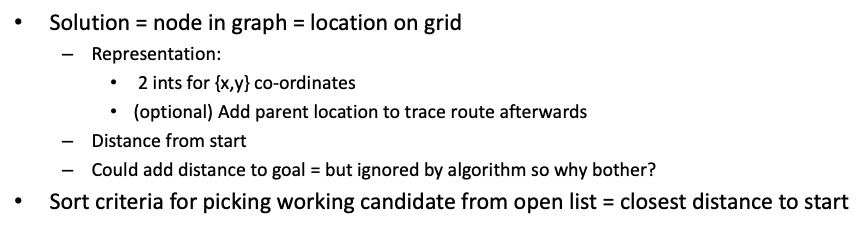


## what does this mean in temrs of our existing pseudocode?
Solution = node in graph = location on grid
- Representation:
  - 2 ints for {x,y} co-ordinates
  - (optional) Add parent location to trace route afterwards
- Distance from start
- Could add distance to goal = but ignored by algorithm so why bother?

Sort criteria for picking working candidate from open list = closest distance to start


## pseudocode for Dijkstra (main loop only)


    WHILE ( Openlist not empty) DO
      SORT(OpenList by increasing distance from start)  ## distance travelled
      MOVE (first item from openList into working candidate)
      FOREACH (1-step neighbour)    neighbour = ApplyMoveOperator(workingCandidate)  
        Evaluate(neighbour) ##using route through workingCandidate                               
        IF(IsAtGoal(neighbour))
           OUTPUT (SUCCESS, neighbour)
        ELSE IF (neighbor is already on openList) ## might have new
           UPDATE(neighbor.dist_to_start on openList) ##quicker route to neighour
        ELSE IF(neighbor is feasible)
           ADD( neighbor to end of openList)
        ELSE
           ADD( neighbor to end of closedList)
      COPY (working candidate to closedList)    


## Quiz Questions
For a ‘decision’ problem, which of these   would be appropriate ?

For an exam timetabling problem which of these   would be appropriate ?

For a npc planning a path to chase someone in a game, which of these   would be appropriate ?

For organising daily delivery schedules, which of these   would be appropriate ?

- Depth-first
- Breadth-first
- Hill-Climbing
- Best-First
- A*
- Dijkstra


## Summary of search topic:
You need to know about and recognise:
- Common framework
- Depth and Best first search when there is no quality function
- Characteristics of a good heuristic quality function
- Simple Hill Climber
- Best first
- A*
- Dijkstra’s Algorithm

You should be able to answer questions about
- How to implement different strategies within a common framework
- Choosing an appropriate search strategy for a problem:
  - Do you have a way of assigning quality?
  - What are your trade-offs for time vs storage vs optimality?
  - Can ‘good-enough’ be ok?
